# 1. project overview

 In this project, we are trying to create a classification-based model based on the "Default of Credit Card Clients Dataset". our main aim is to determine whether a client default in next month or not based on the 25 attributes of this dataset. for this, at first, we check if is there any missing value or not then we analyze the data and finally we create several models established on our feature matrix.

# 2. Dataset overview

Data source url : https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

# Dataset
This dataset contains information on default payments, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.


 
# Content
There are 25 variables:

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars  

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

In [1]:
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics # for checking the model accuracy

#To plot the graph embedded in the notebook
%matplotlib inline

 


# Read the data

In [2]:
# to access local file
import os
os.getcwd()
data_df = pd.read_excel("default of credit card clients.xls")

In [3]:
#Print the keys of dataset
data_df.keys()

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
#check the shape
print(data_df.shape)

(30000, 25)


In [5]:
# To show all colums
pd.set_option('display.max_columns', 100)


In [6]:
# Print the DataFrame
data_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [7]:
# Numerical summary of each attribute 
data_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# 3. Data Preprocessing and Exploratory data analysis

In [8]:
# check if there is any missing data.

total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total','Percent']).transpose()

,ID,BILL_AMT2,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,BILL_AMT6,BILL_AMT5,BILL_AMT4,BILL_AMT3,BILL_AMT1,LIMIT_BAL,PAY_6,PAY_5,PAY_4,PAY_3,PAY_2,PAY_0,AGE,MARRIAGE,EDUCATION,SEX,default payment next month
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# check number of samples for each class
data_df.groupby('default payment next month').size()

default payment next month
0    23364
1     6636
dtype: int64

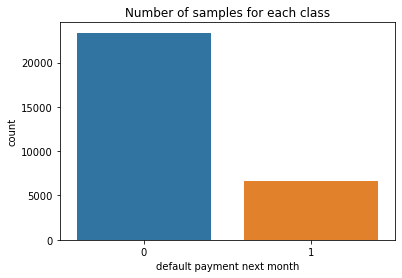

In [10]:
# visualise the number of samples for each class with count plot
sns.countplot(x='default payment next month', data=data_df)
plt.title("Number of samples for each class");

A number of 6636 out of 30000 of clients will default next month.

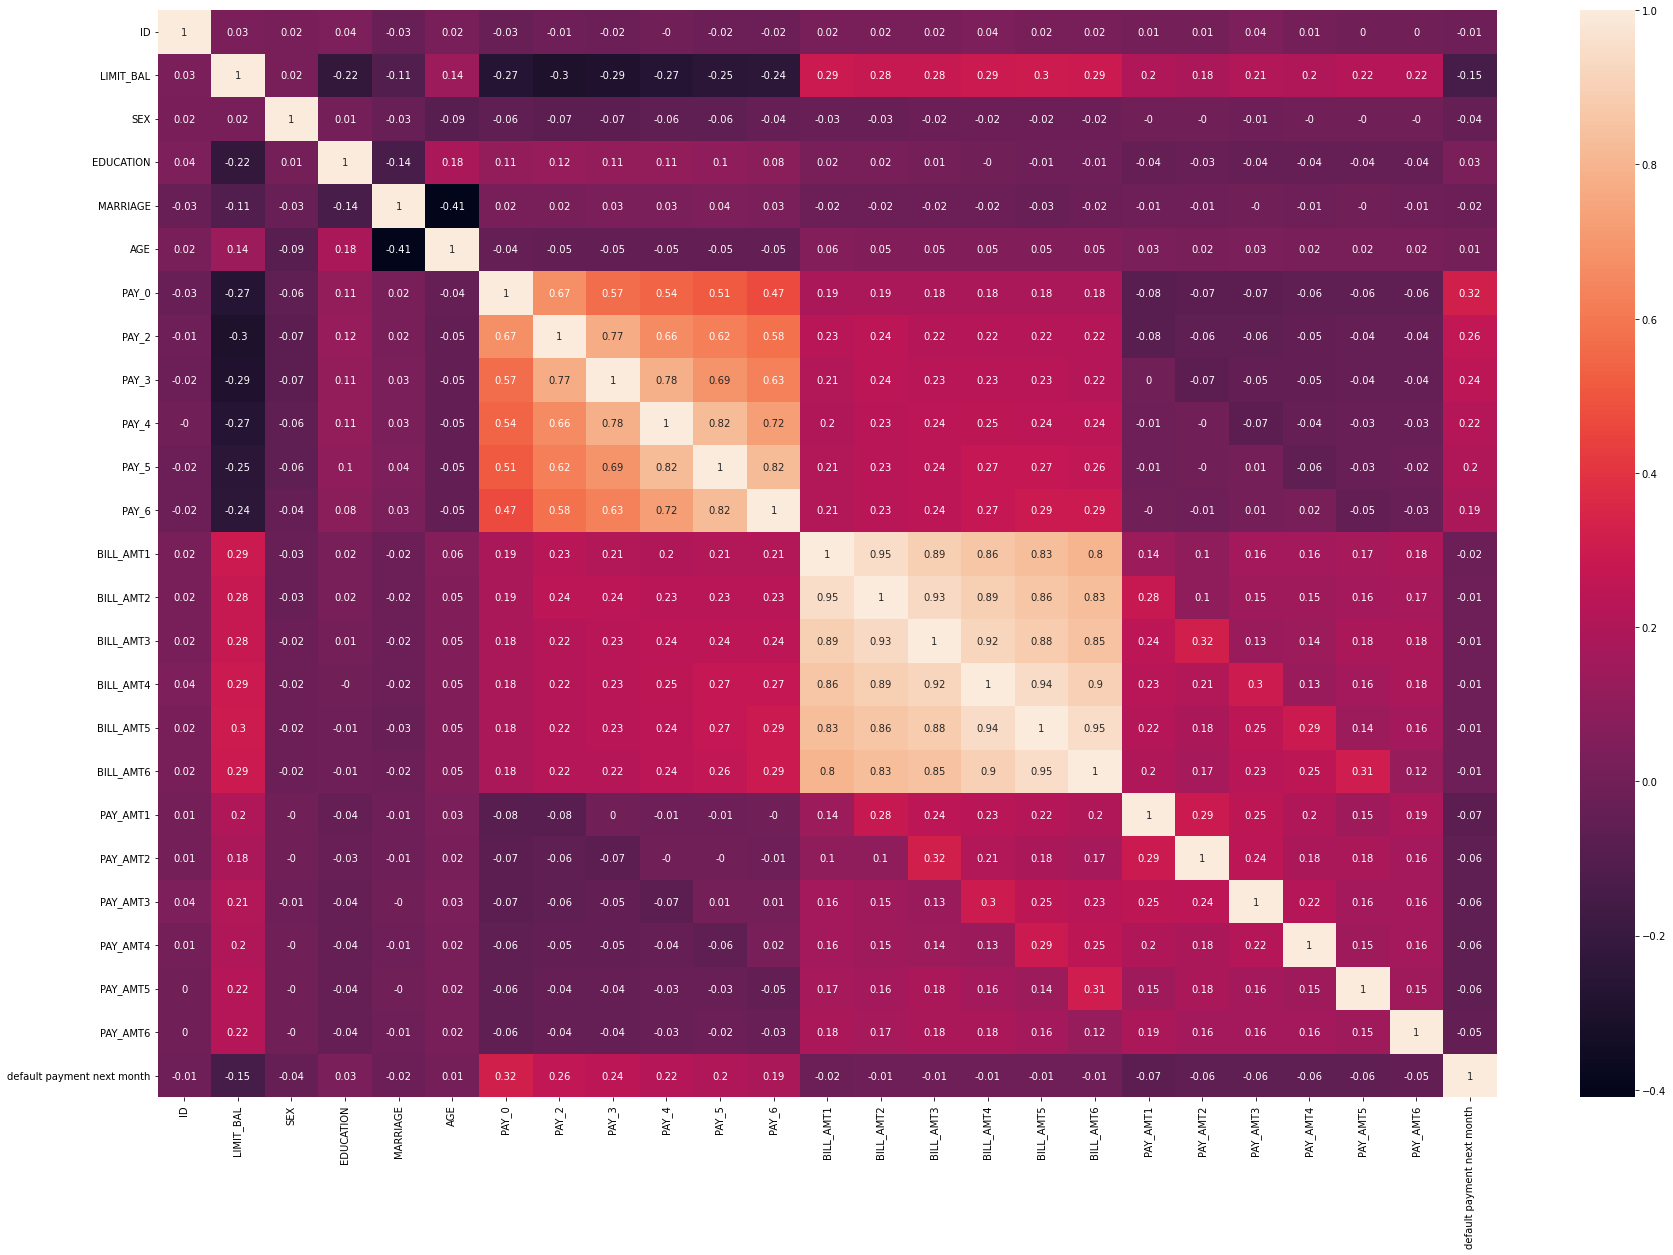

In [11]:
# corr() to calculate the correlation between variables
correlation_matrix = data_df.corr().round(2)

# changing the figure size
plt.figure(figsize = (30, 20))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True);

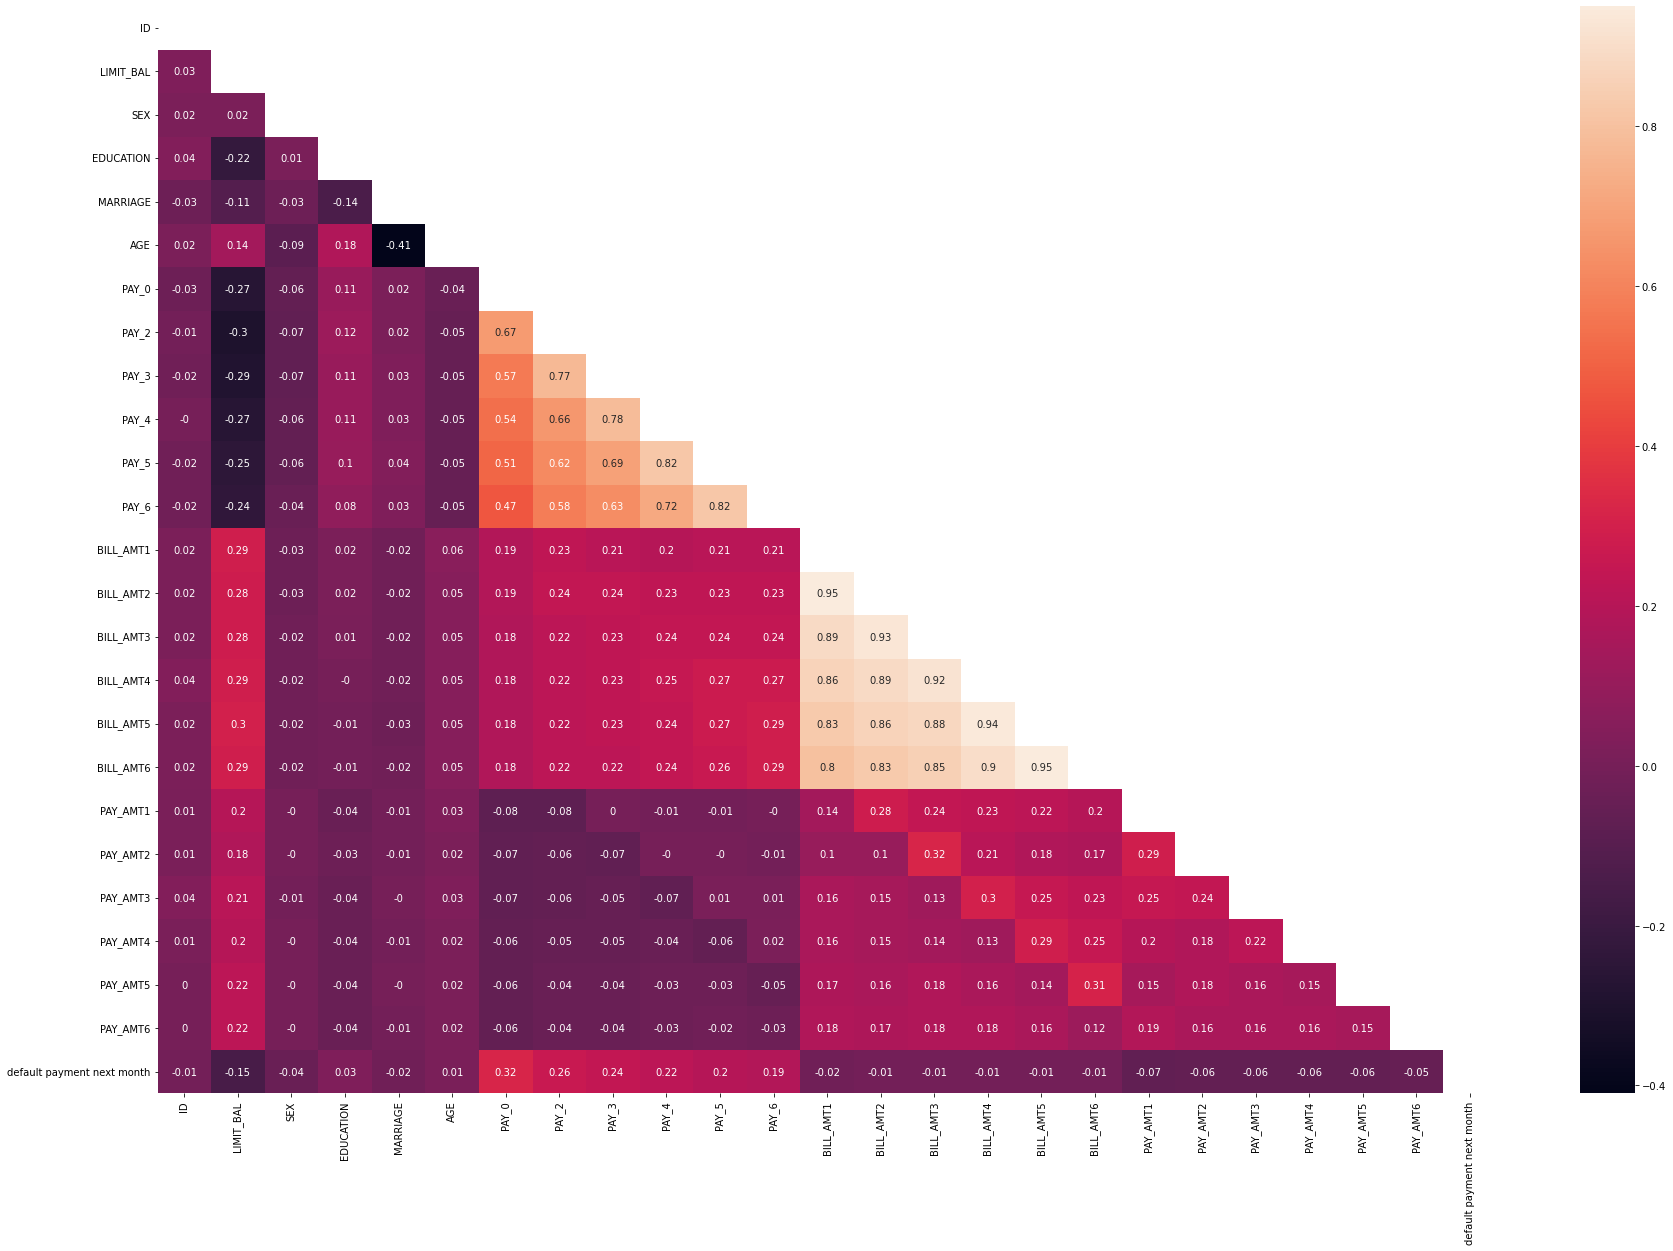

In [12]:
# Steps to remove redundant values
# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True
# changing the figure size
plt.figure(figsize = (30, 20))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, mask=mask);

/home/arafat/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

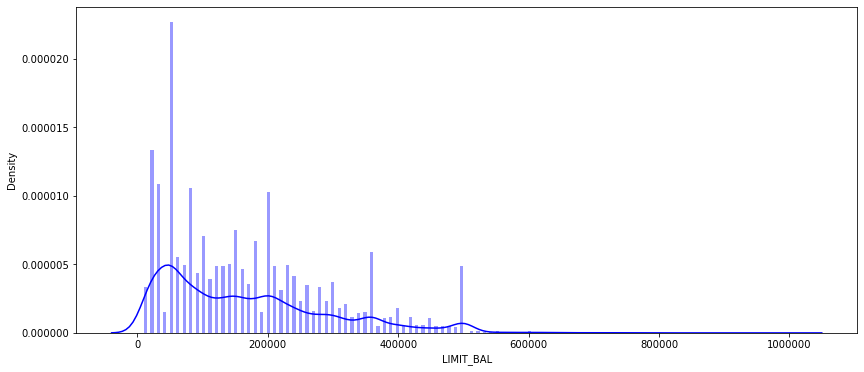

In [13]:
# Amount of credit limit

plt.figure(figsize=(14,6))

plt.ticklabel_format(style='plain', axis='x') # avoiding scientific value
plt.ticklabel_format(style='plain', axis='y') # avoiding scientific value

 
sns.distplot(data_df['LIMIT_BAL'],kde=True, bins=200, color="blue")




In [14]:
data_df['LIMIT_BAL'].value_counts().head(5)


50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: LIMIT_BAL, dtype: int64

the largest number of credit cards are with limit of 50,000 (3365), followed by 20,000 (1976) and 30,000 (1610).

In [15]:
data_df.head(8)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0


/home/arafat/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/arafat/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

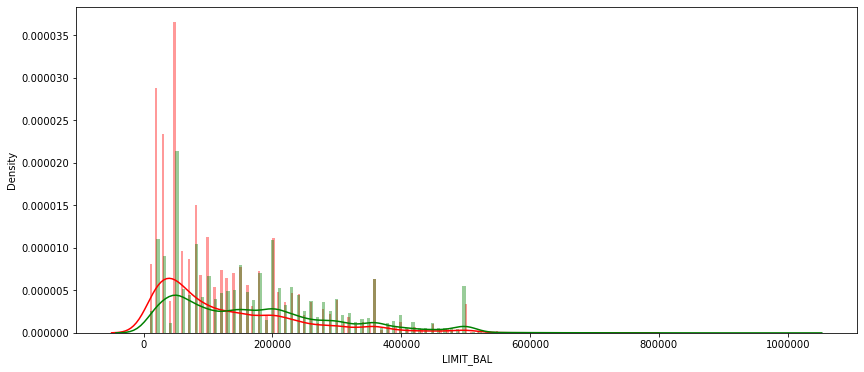

In [16]:
class_0 = data_df.loc[data_df['default payment next month'] == 0]["LIMIT_BAL"]
class_1 = data_df.loc[data_df['default payment next month'] == 1]["LIMIT_BAL"]


plt.figure(figsize=(14,6))

plt.ticklabel_format(style='plain', axis='x') # avoiding scientific value
plt.ticklabel_format(style='plain', axis='y') # avoiding scientific value

 
sns.distplot(class_1,kde=True, bins=200, color="red")
sns.distplot(class_0,kde=True, bins=200, color="green")

Most of defaults are for credit limits 0-100000. Larger defaults number are for the amounts of 50000, 20000 and 30000.

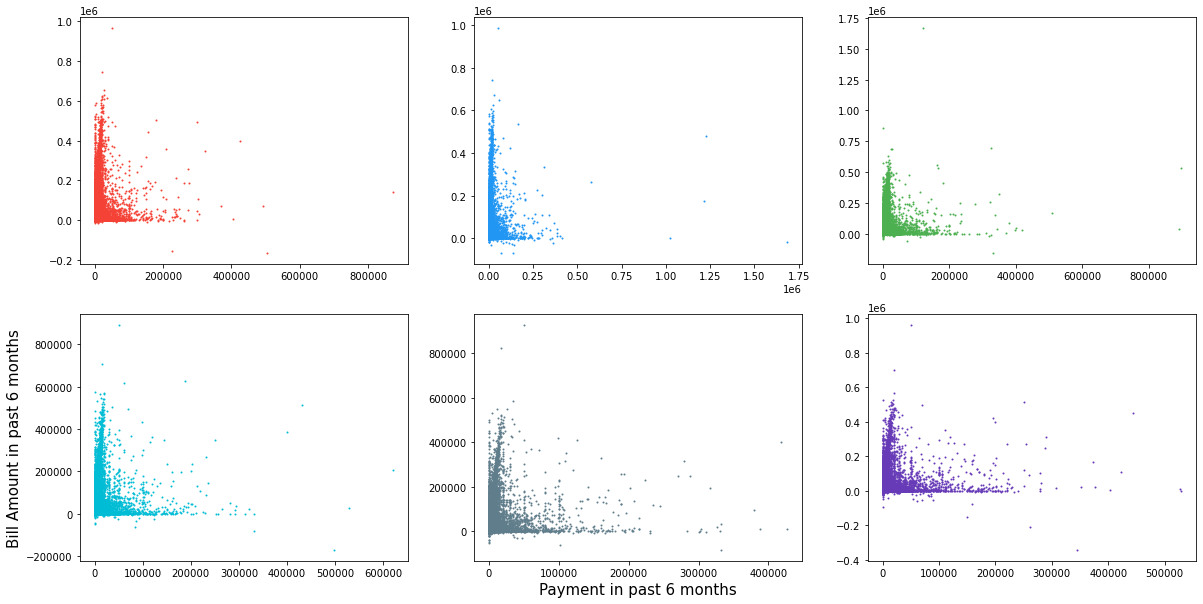

In [17]:
plt.subplots(figsize=(20,10))
 
plt.subplot(231)
plt.scatter(x=data_df.PAY_AMT1, y=data_df.BILL_AMT1, c='#F44336', s=1)

plt.subplot(232)
plt.scatter(x=data_df.PAY_AMT2, y=data_df.BILL_AMT2, c='#2196F3', s=1)

plt.subplot(233)
plt.scatter(x=data_df.PAY_AMT3, y=data_df.BILL_AMT3, c='#4CAF50', s=1)

plt.subplot(234)
plt.scatter(x=data_df.PAY_AMT4, y=data_df.BILL_AMT4, c='#00BCD4', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=15)

plt.subplot(235)
plt.scatter(x=data_df.PAY_AMT5, y=data_df.BILL_AMT5, c='#607D8B', s=1)
plt.xlabel("Payment in past 6 months", fontsize=15)

plt.subplot(236)
plt.scatter(x=data_df.PAY_AMT6, y=data_df.BILL_AMT6, c='#673AB7', s=1)

plt.show()

Above plot indicates that there is higher proportion of clients whom the bill amount is high but payment done against the same is very low.

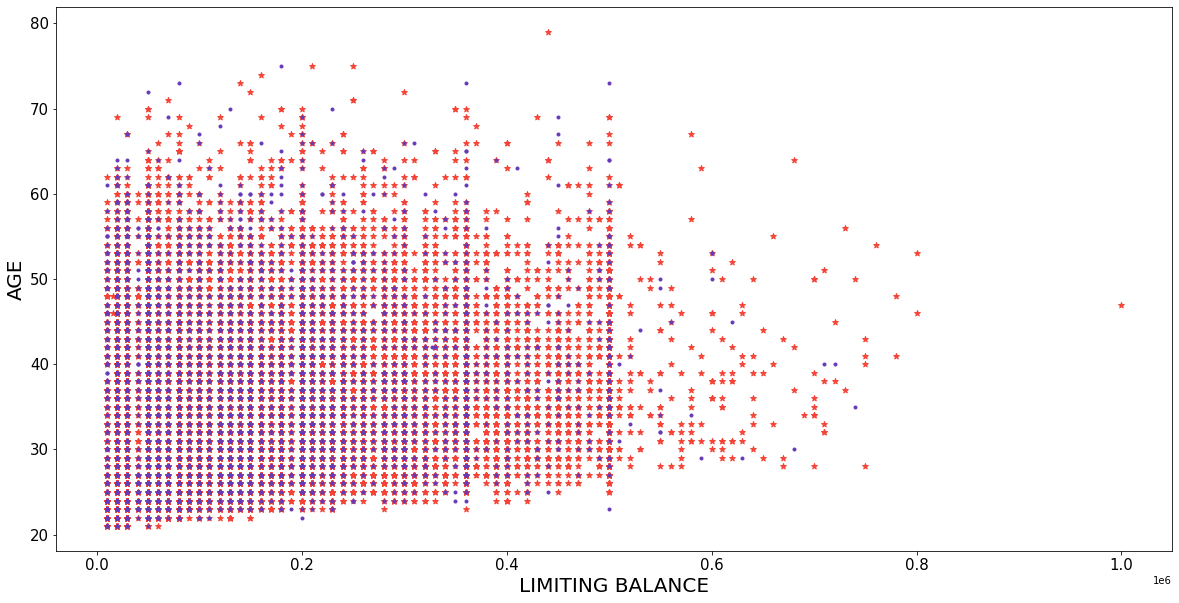

In [18]:
y1 = data_df.AGE[data_df["default payment next month"] == 0]
y2 = data_df.AGE[data_df["default payment next month"] == 1]
x1 = data_df.LIMIT_BAL[data_df["default payment next month"] == 0]
x2 = data_df.LIMIT_BAL[data_df["default payment next month"] == 1]

fig,ax = plt.subplots(figsize=(20,10))
plt.scatter(x1,y1, c='#F44336', marker="*", label='0')
plt.scatter(x2,y2, color="#673AB7", marker=".", label='1')
plt.xlabel("LIMITING BALANCE", fontsize=20)
plt.ylabel("AGE", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Above plot of Age against limiting balance does not provide any accurate information, as there is mixed variation of clients of all age groups and their current month limiting balance.

In [19]:
nominal_value = pd.DataFrame(data_df['default payment next month'])
nominal_value['SEX'] = pd.DataFrame(data_df['SEX'])
nominal_value['EDUCATION'] = pd.DataFrame(data_df['EDUCATION'])
nominal_value['MARRIAGE'] = pd.DataFrame(data_df['MARRIAGE'])


In [20]:
nominal_value.head()

,default payment next month,SEX,EDUCATION,MARRIAGE
0,1,2,2,1
1,1,2,2,2
2,0,2,2,2
3,0,2,2,1
4,0,1,2,1


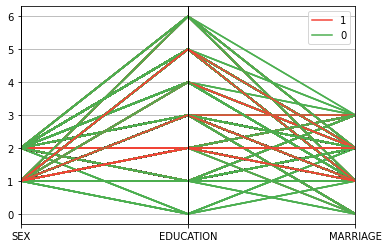

In [21]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(nominal_value, "default payment next month", color = ['#F44336', '#4CAF50' ]);

above plot, we can see 'SEX,EDUCATION and MARRIAGE' has significantly less impact on target as this value are nominal value. 
for Education 1=graduate school, 6=unknown so higher value does not mean higher effect on output

In [22]:
# Drop Nominal columns and Id, as they contain no ordered values
data_df = data_df.drop('SEX', axis=1)
data_df = data_df.drop('EDUCATION', axis=1)
data_df = data_df.drop('MARRIAGE', axis=1)
data_df = data_df.drop('ID', axis=1)



In [23]:
# let's see the DataFrame now
data_df.shape

(30000, 21)

In [24]:
data_df.head(5)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [25]:

temp = data_df[['default payment next month','PAY_0','PAY_2','BILL_AMT1','BILL_AMT2','PAY_AMT1','PAY_AMT2']]

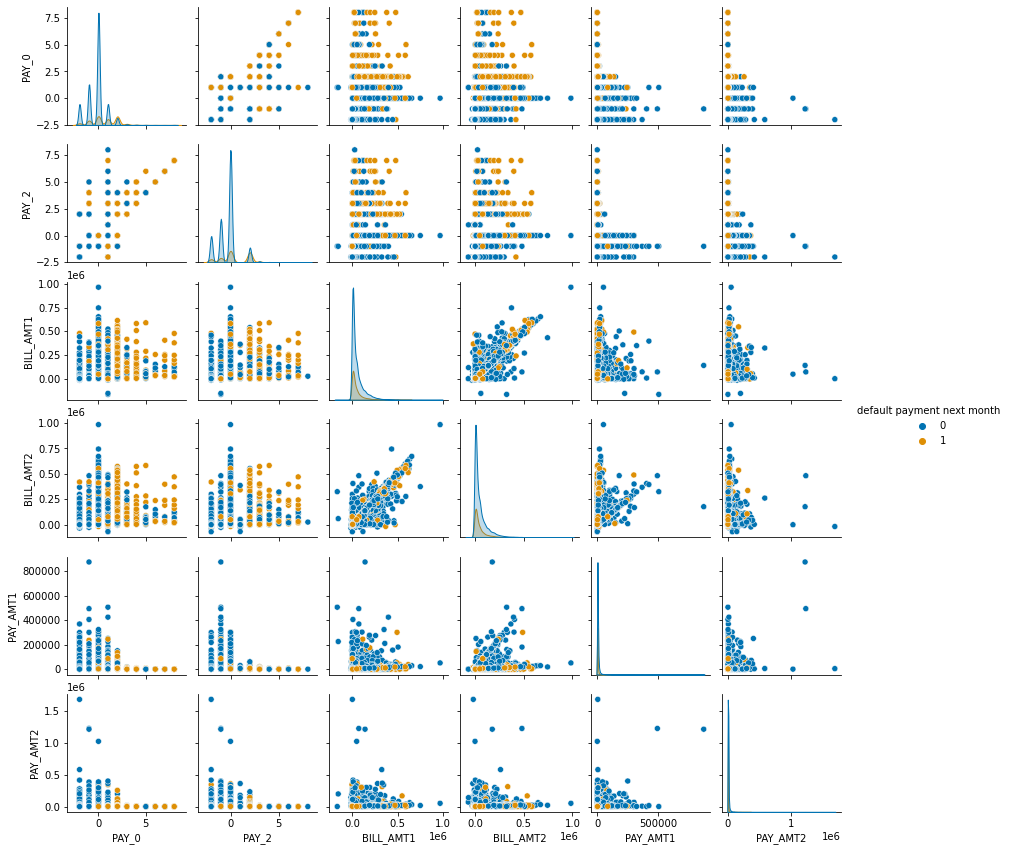

In [26]:
# let's create pairplot to visualise the data for each pair of attributes
sns.pairplot(temp, hue="default payment next month", height = 2, palette = 'colorblind');

# Create Features Matrix & Target Variable

In [27]:
# Target matrix
y = data_df[['default payment next month']]
y.head()

,default payment next month
0,1
1,1
2,0
3,0
4,0


In [50]:
# Feature matrix
x = data_df.drop(['default payment next month','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'], axis=1)
x.head()


,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,20000,24,2,2,-1,-1,-2,-2
1,120000,26,-1,2,0,0,0,2
2,90000,34,0,0,0,0,0,0
3,50000,37,0,0,0,0,0,0
4,50000,57,-1,0,-1,0,0,0


In [51]:
x

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,20000,24,2,2,-1,-1,-2,-2
1,120000,26,-1,2,0,0,0,2
2,90000,34,0,0,0,0,0,0
3,50000,37,0,0,0,0,0,0
4,50000,57,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...
29995,220000,39,0,0,0,0,0,0
29996,150000,43,-1,-1,-1,-1,0,0
29997,30000,37,4,3,2,-1,0,0
29998,80000,41,1,-1,0,0,0,-1


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 16)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (21000, 8)
X_test shape:  (9000, 8)
y_train shape:  (21000, 1)
y_test shape:  (9000, 1)


# 4. Create Model: Naive Bayes

In [53]:
# importing the necessary package to use the classification algorithm
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train) #train the model with the training dataset
y_prediction_nb = model_nb.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
print("---------------------------------")
print('The accuracy of the NB is: {}'.format(score_nb))
print("---------------------------------")

# save the accuracy score
score = set()
score.add(('NB', score_nb))

---------------------------------
The accuracy of the NB is: 0.7793
---------------------------------


/home/arafat/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Create Model: K Nearest Neighbours (KNN)

In [54]:
# importing the necessary package to use the classification algorithm
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
#from sklearn.linear_model import LogisticRegression
# for Logistic Regression algorithm
model_knn = KNeighborsClassifier(n_neighbors=3) # 3 neighbours for putting the new data into a class
model_knn.fit(X_train, y_train) #train the model with the training dataset
y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
print("----------------------------------")
print('The accuracy of the KNN is: {}'.format(score_knn))
print("----------------------------------")
# save the accuracy score
score.add(('KNN', score_knn))


/home/arafat/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


----------------------------------
The accuracy of the KNN is: 0.7759
----------------------------------


# Create Model: Decision Tree

In [55]:
# importing the necessary package to use the classification algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train) #train the model with the training dataset
y_prediction_dt = model_dt.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
print("---------------------------------")
print('The accuracy of the DT is: {}'.format(score_dt))
print("---------------------------------")
# save the accuracy score
score.add(('DT', score_dt))

---------------------------------
The accuracy of the DT is: 0.7631
---------------------------------


# Create Model: Logistic Regression

In [56]:
# importing the necessary package to use the classification algorithm
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train) #train the model with the training dataset
y_prediction_lr = model_lr.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)
print("---------------------------------")
print('The accuracy of the LR is: {}'.format(score_lr))
print("---------------------------------")
# save the accuracy score
score.add(('LR', score_lr))

---------------------------------
The accuracy of the LR is: 0.7776
---------------------------------


/home/arafat/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Create Model: Support Vector Machine (SVM)

In [57]:
# importing the necessary package to use the classification algorithm
from sklearn import svm #for Support Vector Machine (SVM) Algorithm
model_svm = svm.SVC() #select the algorithm
model_svm.fit(X_train, y_train) #train the model with the training dataset
y_prediction_svm = model_svm.predict(X_test) # pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
print("----------------------------------")
print('The accuracy of the SVM is: {}'.format(score_svm))
print("----------------------------------")
# save the accuracy score
score.add(('SVM', score_svm))

/home/arafat/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


----------------------------------
The accuracy of the SVM is: 0.7776
----------------------------------


# 5. discussion and conclusion

# Compare Accuracy Score of Different Models

In [151]:
print("The accuracy scores of different Models:")
print("----------------------------------------")
for s in score:
    print(s)

The accuracy scores of different Models:
----------------------------------------
('NB', 0.7793)
('KNN', 0.7759)
('DT', 0.7631)
('LR', 0.7776)
('SVM', 0.7776)


In [152]:
score_Df = pd.DataFrame(score)
 

Text(0, 0.5, 'Accuracy')

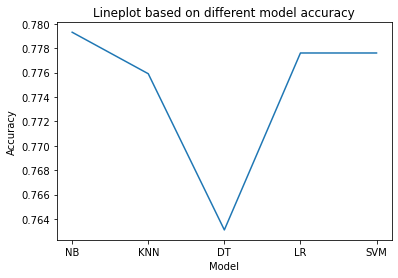

In [153]:

sns.lineplot(x=0,y=1 ,data=score_Df)
plt.title("Lineplot based on different model accuracy");
plt.xlabel("Model")
plt.ylabel("Accuracy")

After performing 5 different models (NB, KNN, DT, LR, and SVM) we can see all these models provide an almost similar type of accuracy around 77%. but BN provide slightly better results than others and it was 77.93%, on the other hand, DT provide less than the others(76.31%). so we can say based on this model NB is the best choice for predicting the default client.